### Simple Linear Regression

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline 

import warnings
# Suppress the specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning, message=".*feature names.*")

In [23]:
df=pd.read_csv("weight_height_dataset.csv")

In [24]:
df.head()

,Weight,Height
0,68.73,155.84
1,97.54,169.11
2,86.60,163.07
3,79.93,159.36
4,57.80,145.94


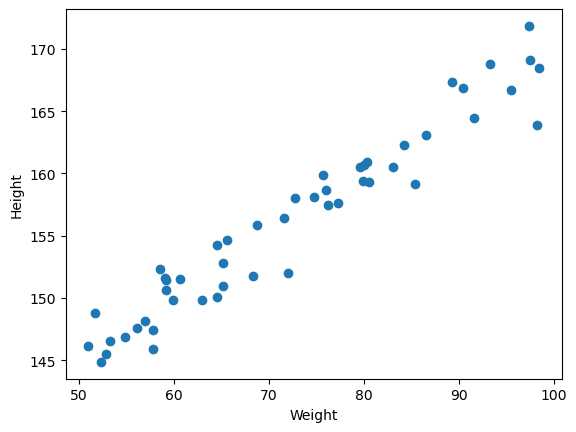

In [25]:
## Scatter Plot - Checking relationship between the input and output variables
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [26]:
df.corr()

,Weight,Height
Weight,1.00000,0.96821
Height,0.96821,1.00000


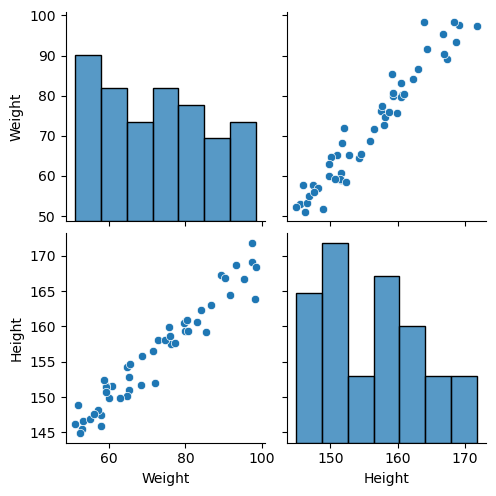

In [27]:

sns.pairplot(df)
plt.show()


In [28]:
X=df[["Weight"]] # Independent Array should be in the form of data frame or 2d array !!!! Important point
x=df["Weight"]
type(X),type(df),type(x)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [29]:
np.array(X).shape, np.array(x).shape # Here X is 2d array, x is 1d array

((50, 1), (50,))

In [30]:
X.head()

,Weight
0,68.73
1,97.54
2,86.60
3,79.93
4,57.80


In [31]:
y=df["Height"] # it can be in series or in 1d since we have only one dependent feature.

In [32]:
np.array(y).shape

(50,)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37, 1), (37,), (13, 1), (13,))

In [35]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [37]:
X_test=scaler.transform(X_test) # we should use transform to avoid Data leakage

In [38]:
X_test.shape

(13, 1)

In [39]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [40]:
regression=LinearRegression()

In [41]:
# regression.fit(x,y_train) 

# ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. 
# Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
print("Coefficient or Slope :",regression.coef_)
print("Intercept :",regression.intercept_)

Coefficient or Slope : [7.16449901]
Intercept : 156.53405405405402


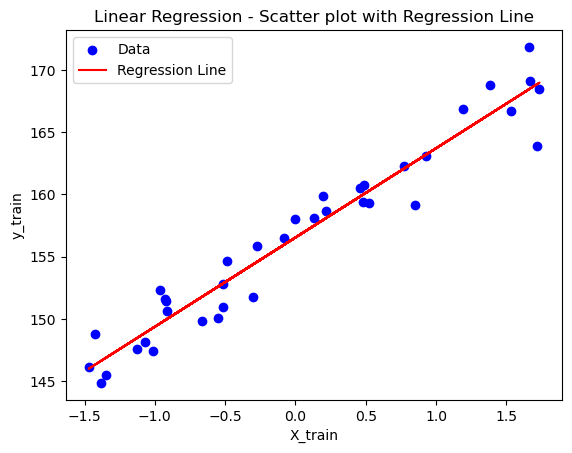

In [44]:
plt.scatter(X_train, y_train, color='blue', label='Data')
# Plot the regression line
plt.plot(X_train, regression.predict(X_train), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Linear Regression - Scatter plot with Regression Line')
plt.legend()

plt.show()

In [45]:
y_pred=regression.predict(X_test)

In [46]:
y_test

13    151.53
39    152.03
30    160.91
45    160.56
17    157.50
48    157.61
26    149.85
25    167.34
32    146.55
19    154.23
12    164.46
4     145.94
37    146.84
Name: Height, dtype: float64

In [47]:
y_pred

array([150.63636204, 156.14981445, 160.20140327, 161.53257044,
       158.19739159, 158.72985846, 150.32656313, 164.49986309,
       147.06883401, 152.54356156, 165.64224656, 149.27131061,
       147.8578531 ])

In [48]:
# First prediction using the equation y = m*x + b
prediction = regression.coef_ * X_test[0] + regression.intercept_
print("First prediction:", prediction)

First prediction: [150.63636204]


In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

3.5306166292376133 1.505019415904227 1.878993514953581


In [51]:
from sklearn.metrics import r2_score

In [52]:
score_r2 = r2_score(y_test,y_pred)

In [53]:
print(score_r2)

0.9220363523680144


In [54]:
n = len(y_test)  # Number of data points
p = X_test.shape[1]
# Calculate Adjusted R-squared
adjusted_R_squared = 1 - ((1 - score_r2) * (n - 1)) / (n - p - 1)
print("Adjusted R-squared:", adjusted_R_squared)

Adjusted R-squared: 0.9149487480378339


Assumptions

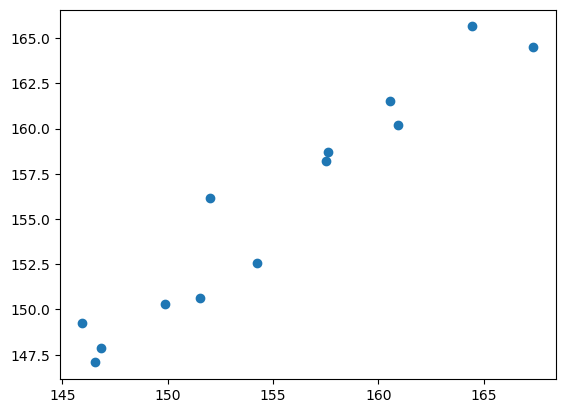

In [60]:
plt.scatter(y_test, y_pred) # Linear

In [61]:
residuals=y_test-y_pred
residuals

13    0.893638
39   -4.119814
30    0.708597
45   -0.972570
17   -0.697392
48   -1.119858
26   -0.476563
25    2.840137
32   -0.518834
19    1.686438
12   -1.182247
4    -3.331311
37   -1.017853
Name: Height, dtype: float64

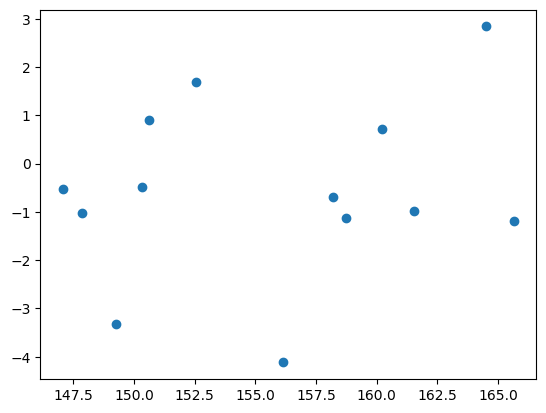

In [67]:
plt.scatter(y_pred,residuals) # Uniformly distributed

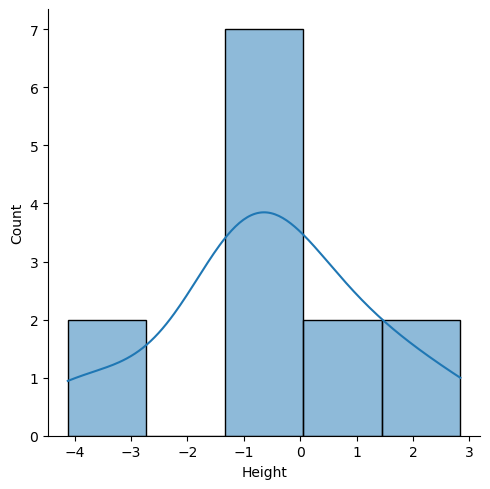

In [66]:
import seaborn as sns 
sns.displot(residuals, kde=True) # Normaly distributed

In [55]:
# OLS
import statsmodels.api as sm

In [56]:
model = sm.OLS(y_train, X_train).fit()

In [57]:
predictions = model.predict(X_test)
print(predictions)

[-5.89769201 -0.38423961  3.66734921  4.99851639  1.66333754  2.19580441
 -6.20749092  7.96580904 -9.46522004 -3.9904925   9.1081925  -7.26274344
 -8.67620095]


In [58]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.026
Method:                 Least Squares   F-statistic:                            0.07540
Date:                Sun, 29 Dec 2024   Prob (F-statistic):                       0.785
Time:                        19:20:04   Log-Likelihood:                         -239.47
No. Observations:                  37   AIC:                                      480.9
Df Residuals:                      36   BIC:                                      482.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
# Prediction for new data
new_weight=np.array([[74.5]])
new_weight_scaled = scaler.transform(new_weight)
predicted_height = regression.predict(new_weight_scaled)
print(f"Predicted height for weight {new_weight[0][0]}: {predicted_height[0]:.2f} cm")

Predicted height for weight 74.5: 157.36 cm
